# 0. Requirements

In [1]:
import os                       # 환경 변수나 디렉터리, 파일 등의 
import cv2                      # 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import dlib                     # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 C++로 개발된 고성능 라이브러리

import numpy as np              # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있드록 하는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
from scipy.ndimage import rotate, affine_transform # affine transform, rotate transform을 위한 scipy

## Dlib landmark 
---
localization
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.

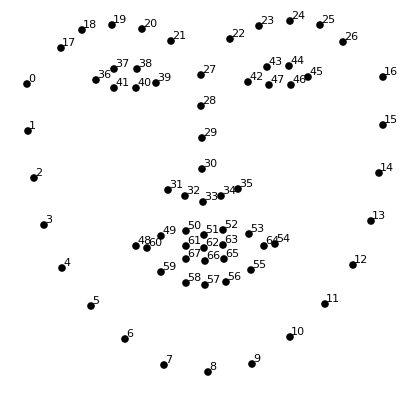

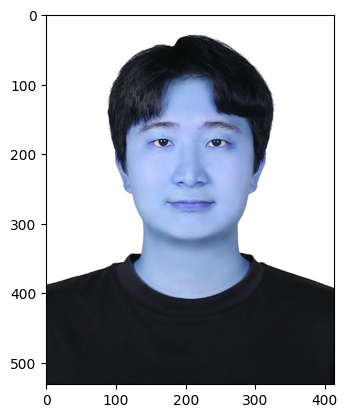

In [2]:
my_image_path = './images/CHJ.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()            # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)                  # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show()                           # 이미지를 출력해준다. (실제 출력)

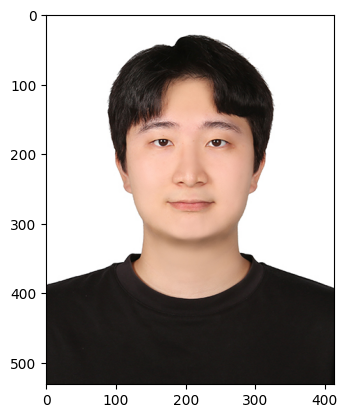

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show()          # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(118, 139) (304, 325)]]


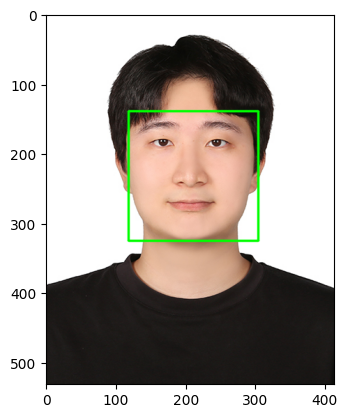

In [5]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = './models/shape_predictor_68_face_landmarks.dat'
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
# 랜드마크의 위치를 저장할 list 생성
list_landmarks = []

# 얼굴 영역 박스마다 face landmark를 찾아냅니다.
# face landmark 좌표를 저장해둡니다.
for dlib_rect in dlib_rects:
    # 모든 landmark의 위치정보를 points 변수에 저장함.
    points = landmark_predictor(img_rgb, dlib_rect)
    # 각각의 landmark 위치 정보를 (x, y) 형태로 변환하여 list_points 리스트로 저장함.
    list_points = list(map(lambda p : (p. x, p.y), points.parts()))
    # list_landmarks에 랜드마크 리스트를 저장함.
    list_landmarks.append(list_points)

# 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
# 각 원소는 68개의 랜드마크 위치가 나열된 list
# list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생함.
print(len(list_landmarks[0]))

68


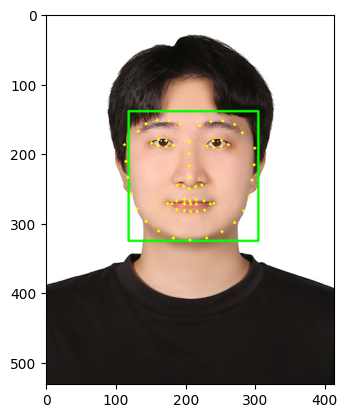

In [8]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        # cv2.circle: OpenCV의 원을 그리는 함수
        # img_show 이미지 위 각각의 point에
        # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
        # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

# RGB 이미지로 전환
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 이미지를 준비
plt.imshow(img_show_rgb)
# 이미지를 출력
plt.show()

In [9]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = (landmark[30][1] + landmark[33][1]) // 2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(205, 234)
(x,y) : (205,242)
(w,h) : (187,187)


In [10]:
cat_sticker_path = './images/cat-whiskers.png'           # 왕관 이미지의 경로
cat_img_sticker = cv2.imread(cat_sticker_path)
cat_img_sticker.shape

(512, 512, 3)

In [11]:
cat_sticker_path = './images/cat-whiskers.png'           # 왕관 이미지의 경로
cat_img_sticker = cv2.imread(cat_sticker_path)       # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
cat_img_sticker = cv2.resize(cat_img_sticker, (w, h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (cat_img_sticker.shape)                    # 사이즈를 조정한 왕관 이미지의 차원 확인

(187, 187, 3)


In [12]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x # 437 - (187//2) = 437-93 = 344
refined_y = y # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (205,242)


In [13]:
sticker_area = img_show[y - (cat_img_sticker.shape[0] - 1) // 2: y + cat_img_sticker.shape[0] // 2 + 1,
                        x - (cat_img_sticker.shape[1] - 1) // 2: x + cat_img_sticker.shape[1] // 2 + 1]
img_show[y - (cat_img_sticker.shape[0] - 1) // 2: y + cat_img_sticker.shape[0] // 2 + 1,
         x - (cat_img_sticker.shape[1] - 1) // 2: x + cat_img_sticker.shape[1] // 2 + 1] = \
          np.where(cat_img_sticker==255,sticker_area,cat_img_sticker).astype(np.uint8)

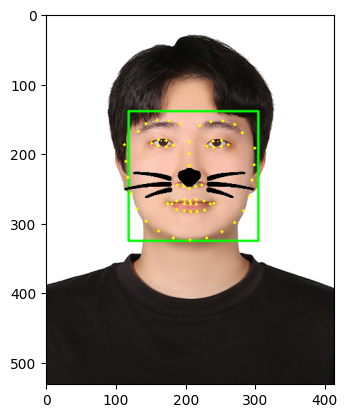

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

(187, 187, 3) 회전 후
(187, 187, 3) 회전 전


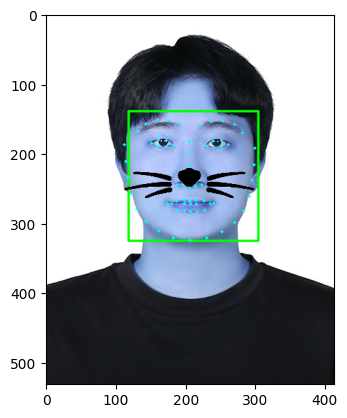

In [20]:
# 기울기 계산
top_nose = np.array(list_landmarks[0][27])
bottom_nose = np.array(list_landmarks[0][33])
slope = top_nose / bottom_nose

# sticker 회전 각도 계산
angle = np.arctan(slope[1] / slope[0]) * 180 / np.pi

# sticker 회전
print(cat_img_sticker.shape, "회전 후")
rotated_sticker = cv2.rotate(cat_img_sticker, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_sticker = cv2.rotate(rotated_sticker, cv2.ROTATE_90_COUNTERCLOCKWISE)
print(rotated_sticker.shape, "회전 전")

# 이후에 사실 각도만큼 affine transform을 해야할 듯 하나, 이건 직접적으로 계산의 영역이 될 듯 해 생략함.

# 이미지 크기에 맞게 sticker 크기 조절
sticker_width = int(img_show.shape[1] * 0.25)
sticker_height = int(rotated_sticker.shape[0] * sticker_width / rotated_sticker.shape[1])
resized_sticker = cv2.resize(rotated_sticker, (sticker_width, sticker_height))

# sticker 중심 좌표 계산
center_x = int(img_show.shape[1] * 0.5)
center_y = int(img_show.shape[0] * 0.5)

# sticker를 이미지에 붙일 위치 계산
x = center_x - int(resized_sticker.shape[1] / 2)
y = center_y - int(resized_sticker.shape[0] / 2)


result = img_show.copy()
img_show[y - (rotated_sticker.shape[0] - 1) // 2: y + rotated_sticker.shape[0] // 2 + 1,
         x - (rotated_sticker.shape[1] - 1) // 2: x + rotated_sticker.shape[1] // 2 + 1] = \
          np.where(rotated_sticker==255,sticker_area,rotated_sticker).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(result/255.0)